In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##import dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Data_Sets/BBC News Train.csv")
test_set = pd.read_csv("/content/drive/MyDrive/Data_Sets/BBC News Test.csv")

##print to show the dataset

In [4]:
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


##print to show the first text of dataset

In [5]:
dataset['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

##shape of dataset

In [6]:
dataset.shape

(1490, 3)

##check information of columns of dataset


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


##count values of given categories




In [8]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

##convert categories name into numerical index

In [9]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


##to show new column were added

In [10]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


##to show category's name with respect to category id

In [11]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


##show category id in dictionary form

In [12]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category.values)
id_to_category = dict(category[['CategoryId', 'Category']].values)
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

##Visulaizing the category data

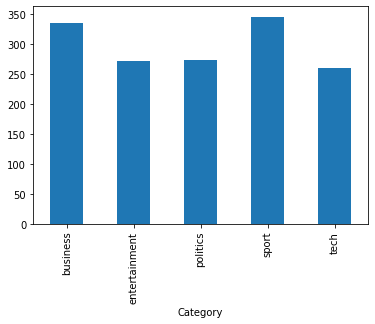

In [13]:
dataset.groupby('Category').CategoryId.count().plot.bar(ylim = 0)

##visualizing category data in numeric form

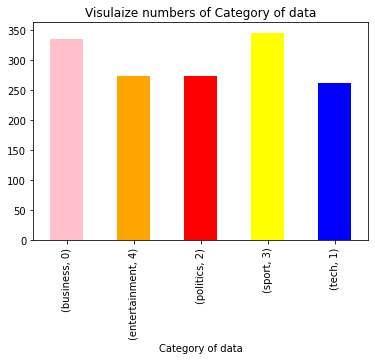

In [14]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

##visualizing category data in percentage form

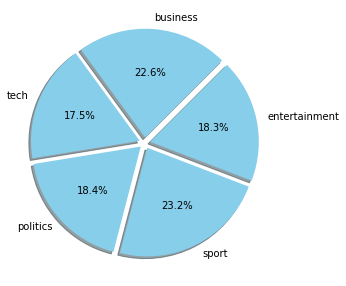

In [15]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

##visualizing category related words

In [16]:
'''

from wordcloud import WordCloud
stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']


def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')
'''

'\n\nfrom wordcloud import WordCloud\nstop = set(stopwords.words(\'english\'))\n\nbusiness = dataset[dataset[\'CategoryId\'] == 0]\nbusiness = business[\'Text\']\n\ntech = dataset[dataset[\'CategoryId\'] == 1]\ntech = tech[\'Text\']\n\npolitics = dataset[dataset[\'CategoryId\'] == 2]\npolitics = politics[\'Text\']\n\nsport = dataset[dataset[\'CategoryId\'] == 3]\nsport = sport[\'Text\']\n\nentertainment = dataset[dataset[\'CategoryId\'] == 4]\nentertainment = entertainment[\'Text\']\n\n\ndef wordcloud_draw(dataset, color = \'white\'):\n  words = \' \'.join(dataset)\n  cleaned_word = \' \'.join([word for word in words.split()\n                           if (word != \'news\' and word != \'text\')])\n  wordcloud = WordCloud(stopwords = stop,\n                        background_color = color,\n                        width = 2500, height = 2500).generate(cleaned_word)\n\n  plt.figure(1, figsize = (10,7))\n  plt.imshow(wordcloud)\n  plt.axis("off")\n  plt.show()\n\nprint("business related w

##print text column of dataset

In [17]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

##print category coulmn of dataset

In [18]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

##remove all tags

In [19]:
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, ' ',text)

dataset['Text'] = dataset['Text'].apply(remove_tags)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

##remove special characters

In [20]:
def special_char(text):
  reviews = ' '
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

dataset['Text'] = dataset['Text'].apply(special_char)
dataset['Text'][1]

' german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1

##convert everything in lower case

In [21]:
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

' german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1

##remove all stopwords

In [22]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

##lemmatizing or stemming the words

In [23]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

##after text_preprocessing print dataset

In [24]:
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


In [25]:
dataset['Text'][4]

'enron boss 168m payout eighteen former enron director agreed 168m 89m settlement deal shareholder lawsuit collapse energy firm leading plaintiff university california announced news adding 10 former director pay 13m pocket settlement put court approval next week enron went bankrupt 2001 emerged hidden hundred million dollar debt collapse firm seventh biggest public u company revenue demise sent shockwaves financial market dented investor confidence corporate america settlement significant holding outside director least partially personally responsible william lerach lawyer leading class action suit enron said hopefully help send message corporate boardroom importance director performing legal duty added term 168m settlement 155m covered insurance none 18 former director admit wrongdoing deal fourth major settlement negotiated lawyer filed class action behalf enron shareholder almost three year ago far including latest deal 500m 378 8m retrieved investor however latest deal include for

##declared dependent and independent value

In [26]:
x = dataset['Text']
y = dataset['CategoryId']

##create and fit bag of words model

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [28]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


##train test and split the dataset into training and test set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


print(len(x_train))
print(len(x_test))


1043
447


In [30]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


#**Data Preprocessing**

##create empty list

In [31]:
#create list of model and accuracy dicts
perform_list = []

##create, fit and predict all Machine learning model

In [32]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

##Logistic Regression

In [33]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Recall    : 0.970917225950783
F1-score   : 0.9709172259507831


##Random Forest

In [34]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 97.99
Precision : 0.9798657718120806
Recall    : 0.9798657718120806
F1-score   : 0.9798657718120806


##Multinomial Naive Bayes

In [35]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Recall    : 0.970917225950783
F1-score   : 0.9709172259507831


##Support vector machine

In [36]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 96.64
Precision : 0.9664429530201343
Recall    : 0.9664429530201343
F1-score   : 0.9664429530201343


##Decision Tree

In [37]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 82.77
Precision : 0.8277404921700223
Recall    : 0.8277404921700223
F1-score   : 0.8277404921700223


##KNN

In [38]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.6
Precision : 0.7360178970917226
Recall    : 0.7360178970917226
F1-score   : 0.7360178970917226


##Gaussian Naive Bayes

In [39]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall    : 0.7606263982102909
F1-score   : 0.7606263982102909


##create dataframe of model, accuracy, precision,recall and f1

In [40]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.09,0.97,0.97,0.97
1,Random Forest,97.99,0.98,0.98,0.98
2,Multinomial Naive Bayes,97.09,0.97,0.97,0.97
3,Support Vector Classifer,96.64,0.97,0.97,0.97
4,Decision Tree Classifier,82.77,0.83,0.83,0.83
5,K Nearest Neighbour,73.60,0.74,0.74,0.74
6,Gaussian Naive Bayes,76.06,0.76,0.76,0.76


##best model to perform accuracy score

In [41]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 97.99 from Random


In [48]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier

RandomForestClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred = classifier.predict(x_test)

In [56]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

Sports News


In [68]:
lst = ["Hour ago,I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin",
       "The happiness curriculum will be introduced for the students of classes 1 to 8 as it will enable them to connect with themselves, family, society, nature and the country, Malviya said, adding that children will be taught meditation as well.",
       "After their wedding, Katrina Kaif and Vicky Kaushal moved into a sea-facing apartment in Mumbai's Juhu. Virat Kohli and Anushka Sharma also own two floors in the same building. Before her wedding, Katrina Kaif had been living in an apartment in Andheri with sister Isabelle, who is also an actress, while Vicky Kaushal used to stay in Andheri with his family.",
       "The IT major will buy entire stake in Texas-headquartered Edgile, for $230 million, to strengthen its leadership in strategic cybersecurity services.",
       "This is an incredible opening,David A. Gross, who runs Franchise Entertainment Research, told AFP. While most big series struggle to keep their momentum, he added, Spider-Man is exploding"
       ]

for x in lst:
  ans = str(x.split())
  print(x)
  '''
  y_pred1 = cv.transform(x)
  yy = classifier.predict(y_pred1)
  result = ""
  if yy == [0]:
    result = "Business News"
  elif yy == [1]:
    result = "Tech News"
  elif yy == [2]:
    result = "Politics News"
  elif yy == [3]:
    result = "Sports News"
  elif yy == [1]:
    result = "Entertainment News"
print(result)'''

Hour ago,I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin
The happiness curriculum will be introduced for the students of classes 1 to 8 as it will enable them to connect with themselves, family, society, nature and the country, Malviya said, adding that children will be taught meditation as well.
After their wedding, Katrina Kaif and Vicky Kaushal moved into a sea-facing apartment in Mumbai's Juhu. Virat Kohli and Anushka Sharma also own two floors in the same building. Before her wedding, Katrina Kaif had been living in an apartment in Andheri with sister Isabelle, who is also an actress, while Vicky Kaushal used to stay in Andheri with his family.
The IT major will buy entire stake in Texas-headquartered Edgile, for $230 million, to strengthen its leadership in strategic 

#Individual train, fit and predict the model

##regression Model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("accuracy of our model is:",score)
print(classification_report(y_pred, y_test, target_names=target_category))

##Naive Bayes Model

In [ ]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

In [ ]:
ypg = gnb.predict(x_test)
ypm = mnb.predict(x_test)
ypb = bnb.predict(x_test)

print("Gaussian = ",accuracy_score(y_test,ypg))
print("Multinomial = ",accuracy_score(y_test,ypm))
print("Bernoulli = ",accuracy_score(y_test,ypb))

print(classification_report(ypm, y_test, target_names=target_category))

##Support vector Model

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred1 = svc.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_pred1, y_test, target_names=target_category))

##Decision Tree Model

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred2 = classifier.predict(x_test)
print(accuracy_score(y_test , y_pred2))
print(classification_report(y_pred2, y_test, target_names=target_category))

##Random Tree Model

In [ ]:
forest = RandomForestClassifier(n_estimators=10 ,criterion='entropy' , random_state=0)
forest.fit(x_train,y_train)
y_pred3 = forest.predict(x_test)

print(accuracy_score(y_test , y_pred3))
print(classification_report(y_pred3, y_test, target_names=target_category))

In [ ]:
neighbor = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 3)
neighbor.fit(x_train,y_train)
y_pred4 = neighbor.predict(x_test)
print(accuracy_score(y_test , y_pred4))
print(classification_report(y_pred4, y_test, target_names=target_category))